In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
file = pd.read_csv("USA_Housing.csv")

In [8]:
file.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1059033.557870,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1505890.914847,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1058987.987876,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1260616.806629,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,630943.489339,USNS Raymond\nFPO AE 09386


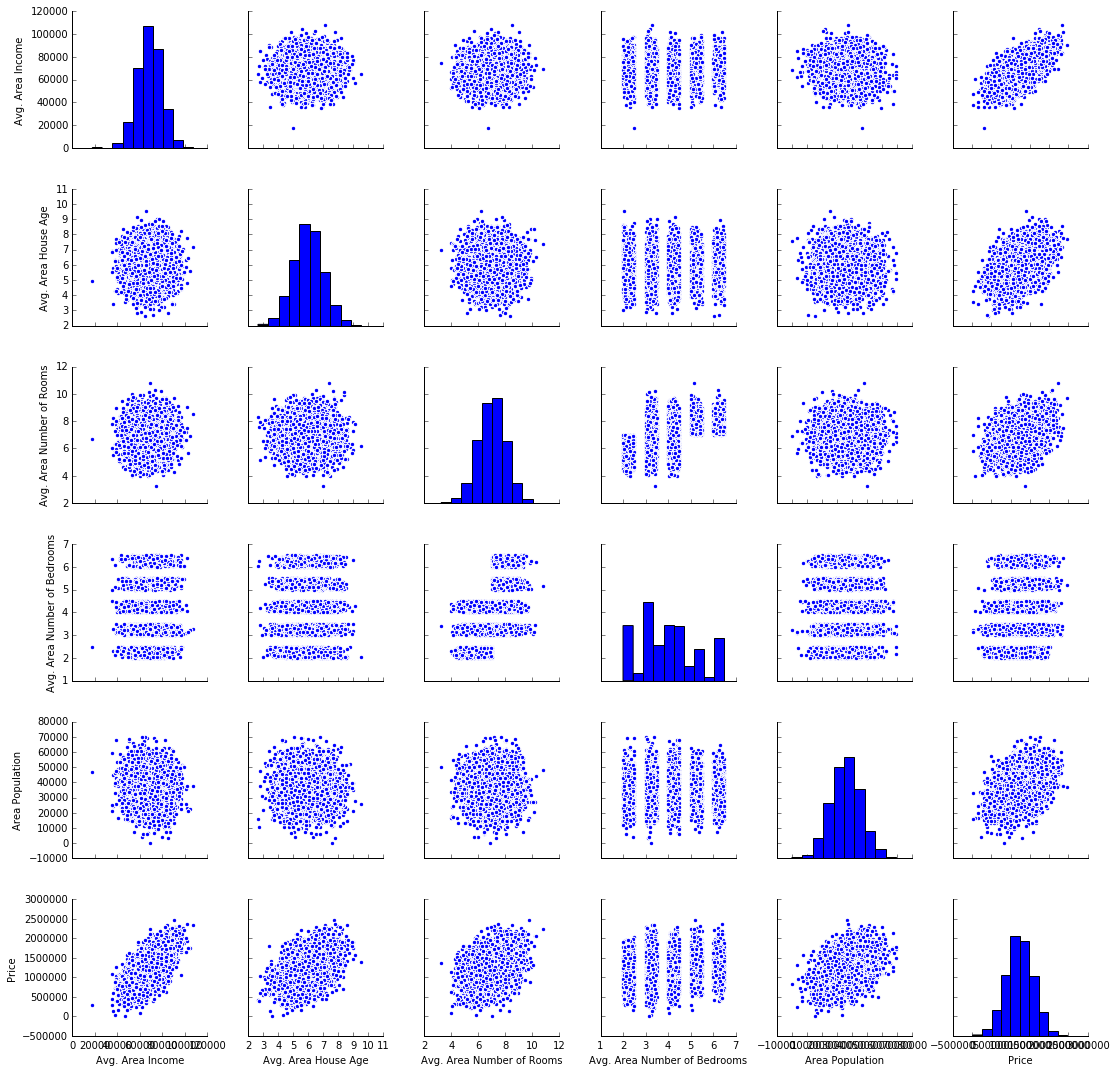

In [9]:
sns.pairplot(file)

In [10]:
file.columns


Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population', u'Price', u'Address'],
      dtype='object')

In [11]:
X=file[[u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population']]


In [12]:
y=file[u'Price']

In [13]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:

linearRegression = LinearRegression()

In [17]:
linearRegression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
linearRegression.intercept_


-2643568.0100615453

In [19]:
linearRegression.coef_


array([2.16554910e+01, 1.65154018e+05, 1.21027857e+05, 2.12906926e+03,
       1.51804898e+01])

In [20]:
Regression_data = pd.DataFrame(linearRegression.coef_,X.columns, columns=["Coefficient"])

In [21]:
Regression_data

,Coefficient
Avg. Area Income,21.655491
Avg. Area House Age,165154.018219
Avg. Area Number of Rooms,121027.857267
Avg. Area Number of Bedrooms,2129.069264
Area Population,15.180490


In [22]:
prediction = linearRegression.predict(X_test)

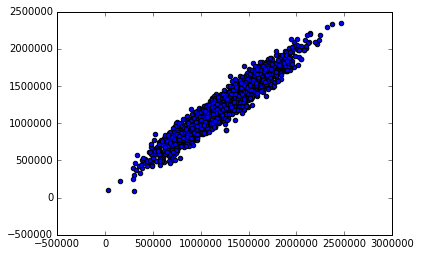

In [23]:
plt.scatter(y_test,prediction)

In [24]:
from sklearn import metrics

In [25]:
metrics.mean_absolute_error(y_test,prediction)

81103.6540100018

In [26]:
metrics.mean_squared_error(y_test,prediction)

10228662791.705692

In [27]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

101136.85179847004